
TensorFlow version: 2.15.0
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
            

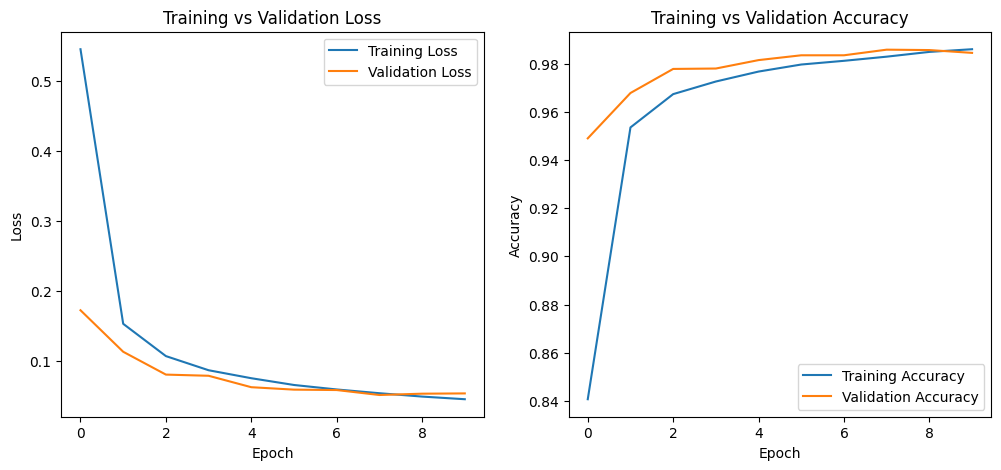

In [1]:
# --------------------------------------------------------
# 1. Import required packages
# --------------------------------------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("TensorFlow version:", tf.__version__)

# --------------------------------------------------------
# 2. Load MNIST CSV files
# --------------------------------------------------------
train = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/mnist_train.csv")
test = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/mnist_test.csv")

# Extract labels (first column)
y_train = train.pop("label").values
y_test = test.pop("label").values

# Pixel values (remaining 784 columns)
x_train = train.values
x_test = test.values

# Reshape 784 → 28×28×1 and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# --------------------------------------------------------
# 3. Build CNN Model
# --------------------------------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # digits 0–9
])

model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# --------------------------------------------------------
# 4. Train the CNN model
# --------------------------------------------------------
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# --------------------------------------------------------
# 5. Evaluate the model on test data
# --------------------------------------------------------
loss, accuracy = model.evaluate(x_test, y_test)
print("✅ Test Loss:", loss)
print("✅ Test Accuracy:", accuracy)

# --------------------------------------------------------
# 6. Plot training loss and accuracy
# --------------------------------------------------------
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
